 Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


Overview of the Data
    1.understand the structure of the dataset 
    2.number of rows and columns 
    3.datatyes etc...

In [3]:
#reading data make it read for the EDA
df = pd.read_csv("../data/raw/creditriskmodeldata.csv")
print("the data set readed successfully")
print("Dataset Shape: ",df.shape)
print("Dataset number of row: ", df.shape[0])
print("Dataset number of columns: ", df.shape[1])
print("Dataset data type for every columns :\n",df.dtypes)


the data set readed successfully
Dataset Shape:  (95662, 16)
Dataset number of row:  95662
Dataset number of columns:  16
Dataset data type for every columns :
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [6]:
#lets see this in table form
visualtable = pd.DataFrame({
    "Columns":df.columns,
    "Type":[str(dtype) for dtype in df.dtypes ],
    "Description|Definition":[
        "Unique transaction identifier on platform",
        "Unique number assigned to a batch of transactions for processing",
        "Unique number identifying the customer on platform",
        "Unique number identifying the customer subscription",
        "Unique identifier attached to Account",
        "Country currency",
        "Numerical geographical code of country",
        "Source provider of Item bought",
        "Item name being bought",
        "ProductIds are organized into these broader product categories",
        "Identifies if customer used web,Android, IOS, pay later or checkout",
        "Value of the transaction. Positive for debits from customer account and negative for credit into customer account",
        "Absolute value of the amount",
        "Transaction start time	",
        "Category of Xente's pricing structure for merchants",
        "Fraud status of transaction 1 -yes or 0-No"]
})				
display(visualtable)	

,Columns,Type,Description|Definition
0,TransactionId,object,Unique transaction identifier on platform
1,BatchId,object,Unique number assigned to a batch of transacti...
2,AccountId,object,Unique number identifying the customer on plat...
3,SubscriptionId,object,Unique number identifying the customer subscri...
4,CustomerId,object,Unique identifier attached to Account
5,CurrencyCode,object,Country currency
6,CountryCode,int64,Numerical geographical code of country
7,ProviderId,object,Source provider of Item bought
8,ProductId,object,Item name being bought
9,ProductCategory,object,ProductIds are organized into these broader pr...



--- Numerical Features Summary ---


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


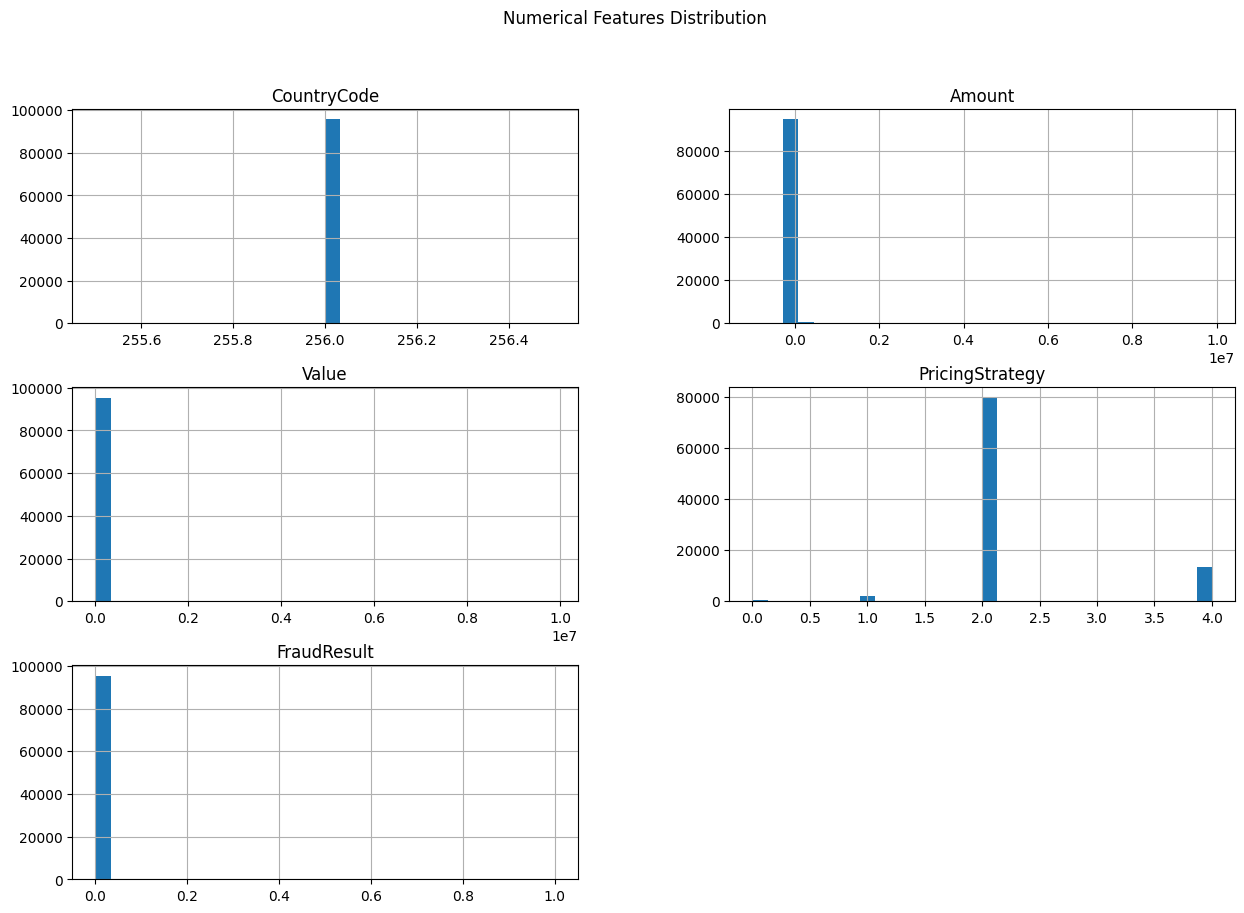

In [7]:
#Numerical Features Overview
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
print("\n--- Numerical Features Summary ---")
display(df[numerical_cols].describe())

#lets visualize the numerical features 
df[numerical_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Numerical Features Distribution")
plt.show()

Summary Statistics 
    1.centeral tendency
    2.dispersion
    3.shape of dataset distribution
    

,Count,Mean,Median,Std,Min,Max,25%,75%,Skewness,Kurtosis
CountryCode,95662,256.00,256.0,0.00,256.0,256.0,256.0,256.0,0.00,0.00
Amount,95662,6717.85,1000.0,123306.80,-1000000.0,9880000.0,-50.0,2800.0,51.10,3363.13
Value,95662,9900.58,1000.0,123122.09,2.0,9880000.0,275.0,5000.0,51.29,3378.07
PricingStrategy,95662,2.26,2.0,0.73,0.0,4.0,2.0,2.0,1.66,2.09
FraudResult,95662,0.00,0.0,0.04,0.0,1.0,0.0,0.0,22.20,490.69


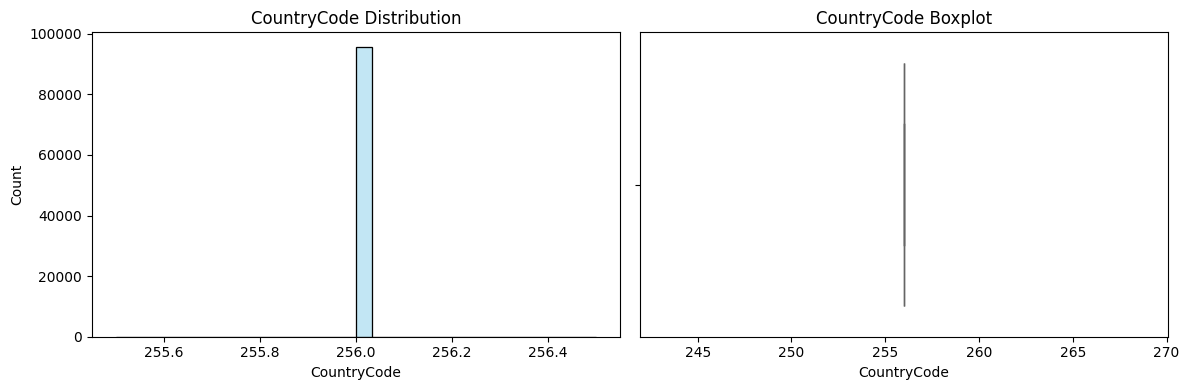

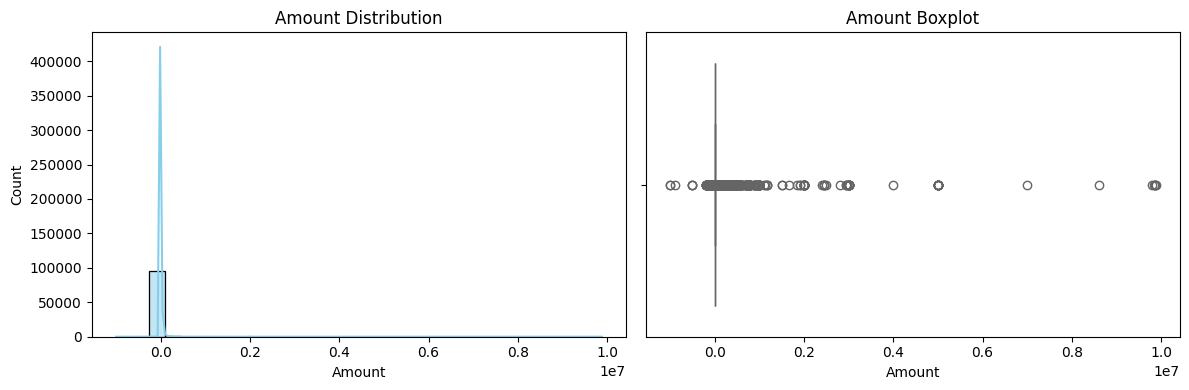

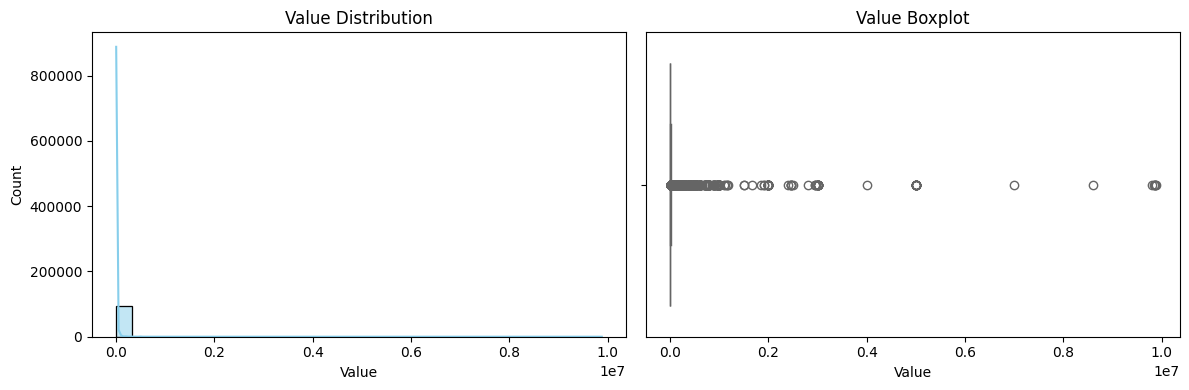

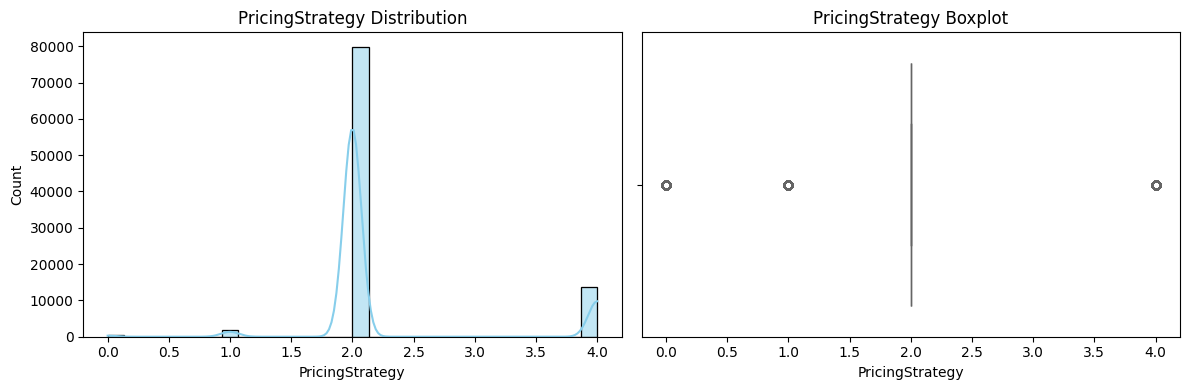

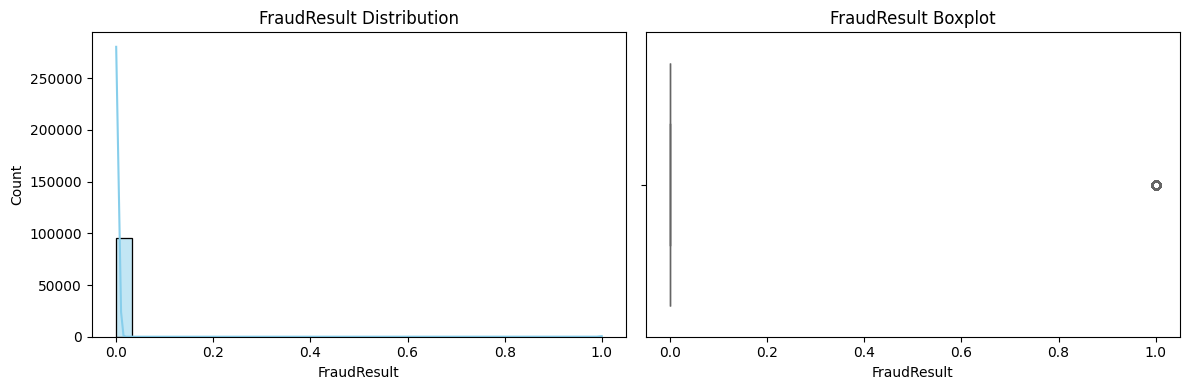

In [8]:
# Create a summary table
summary_stats = pd.DataFrame(index=numerical_cols)
summary_stats['Count'] = df[numerical_cols].count()
summary_stats['Mean'] = df[numerical_cols].mean()
summary_stats['Median'] = df[numerical_cols].median()
summary_stats['Std'] = df[numerical_cols].std()
summary_stats['Min'] = df[numerical_cols].min()
summary_stats['Max'] = df[numerical_cols].max()
summary_stats['25%'] = df[numerical_cols].quantile(0.25)
summary_stats['75%'] = df[numerical_cols].quantile(0.75)
summary_stats['Skewness'] = df[numerical_cols].skew()
summary_stats['Kurtosis'] = df[numerical_cols].kurtosis()

display(summary_stats.round(2))

# Visualizations
for col in numerical_cols:
    plt.figure(figsize=(12,4))
    
    # Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"{col} Distribution")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='darkgray')
    plt.title(f"{col} Boxplot")
    
    plt.tight_layout()
    plt.show()



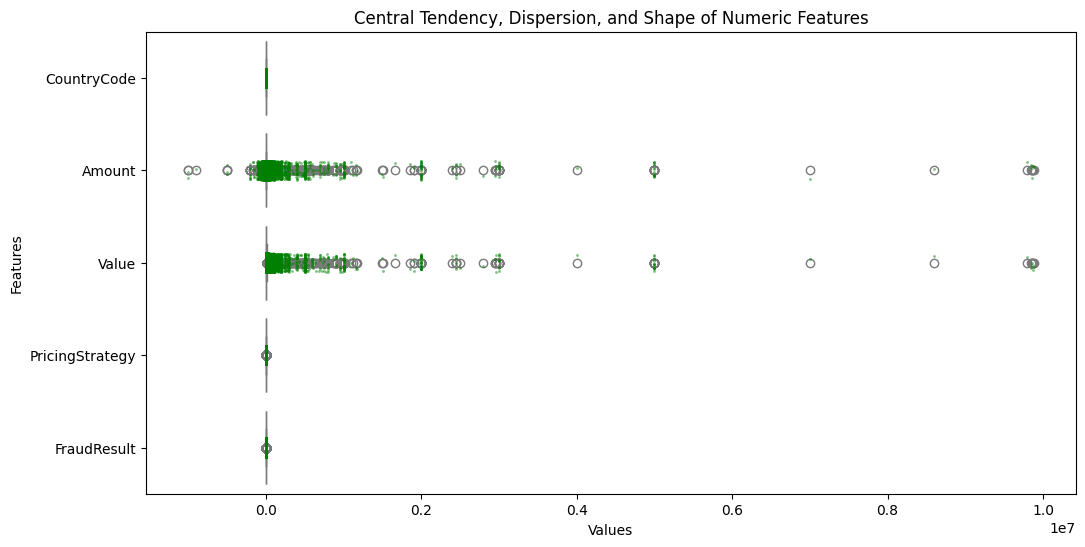

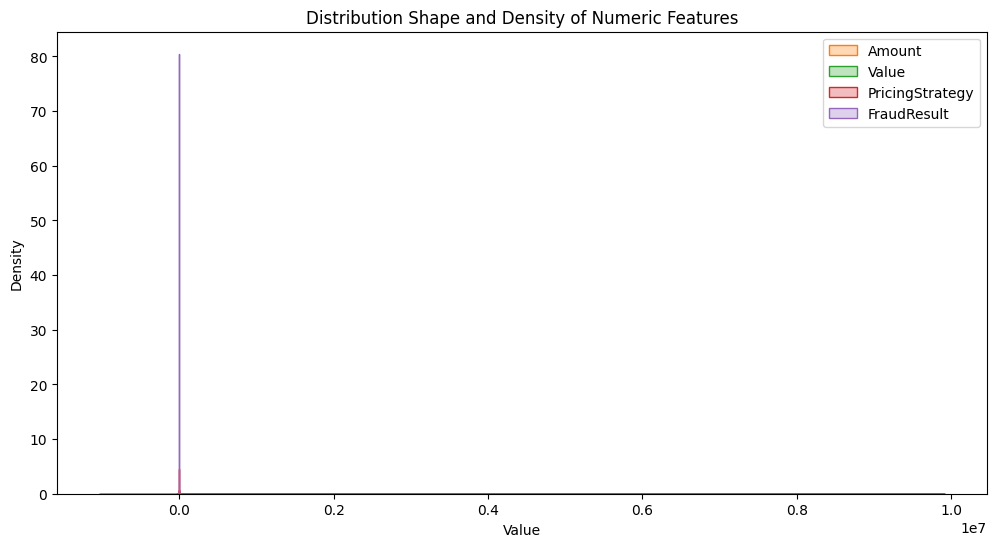

In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols], orient='h', palette="Pastel1")
sns.stripplot(data=df[numerical_cols], orient='h', color='green', size=2, alpha=0.5)
plt.title("Central Tendency, Dispersion, and Shape of Numeric Features")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()
import numpy as np

plt.figure(figsize=(12,6))
for col in numerical_cols:
    sns.kdeplot(df[col], label=col, fill=True, alpha=0.3,warn_singular=False)

plt.title("Distribution Shape and Density of Numeric Features")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()




Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,95662.00,95662.00,95662.00,95662.00
mean,256.0,6717.85,9900.58,2.26,0.00
median,256.0,1000.00,1000.00,2.00,0.00
std,0.0,123306.80,123122.09,0.73,0.04
min,256.0,-1000000.00,2.00,0.00,0.00
max,256.0,9880000.00,9880000.00,4.00,1.00
skew,0.0,51.10,51.29,1.66,22.20
kurt,0.0,3363.13,3378.07,2.09,490.69
<lambda>,256.0,-50.00,275.00,2.00,0.00
<lambda>,256.0,2800.00,5000.00,2.00,0.00



Column: CountryCode
 - Mean: 256.00, Median: 256.00, Std: 0.00, Skewness: 0.00
   * Approximately symmetric distribution
 - Outliers detected: 0 (0.00%)

Column: Amount
 - Mean: 6717.85, Median: 1000.00, Std: 123306.80, Skewness: 51.10
   * Highly positively skewed → consider log transformation
 - Outliers detected: 24441 (25.55%)

Column: Value
 - Mean: 9900.58, Median: 1000.00, Std: 123122.09, Skewness: 51.29
   * Highly positively skewed → consider log transformation
 - Outliers detected: 9021 (9.43%)

Column: PricingStrategy
 - Mean: 2.26, Median: 2.00, Std: 0.73, Skewness: 1.66
   * Highly positively skewed → consider log transformation
 - Outliers detected: 15814 (16.53%)

Column: FraudResult
 - Mean: 0.00, Median: 0.00, Std: 0.04, Skewness: 22.20
   * Highly positively skewed → consider log transformation
 - Outliers detected: 193 (0.20%)


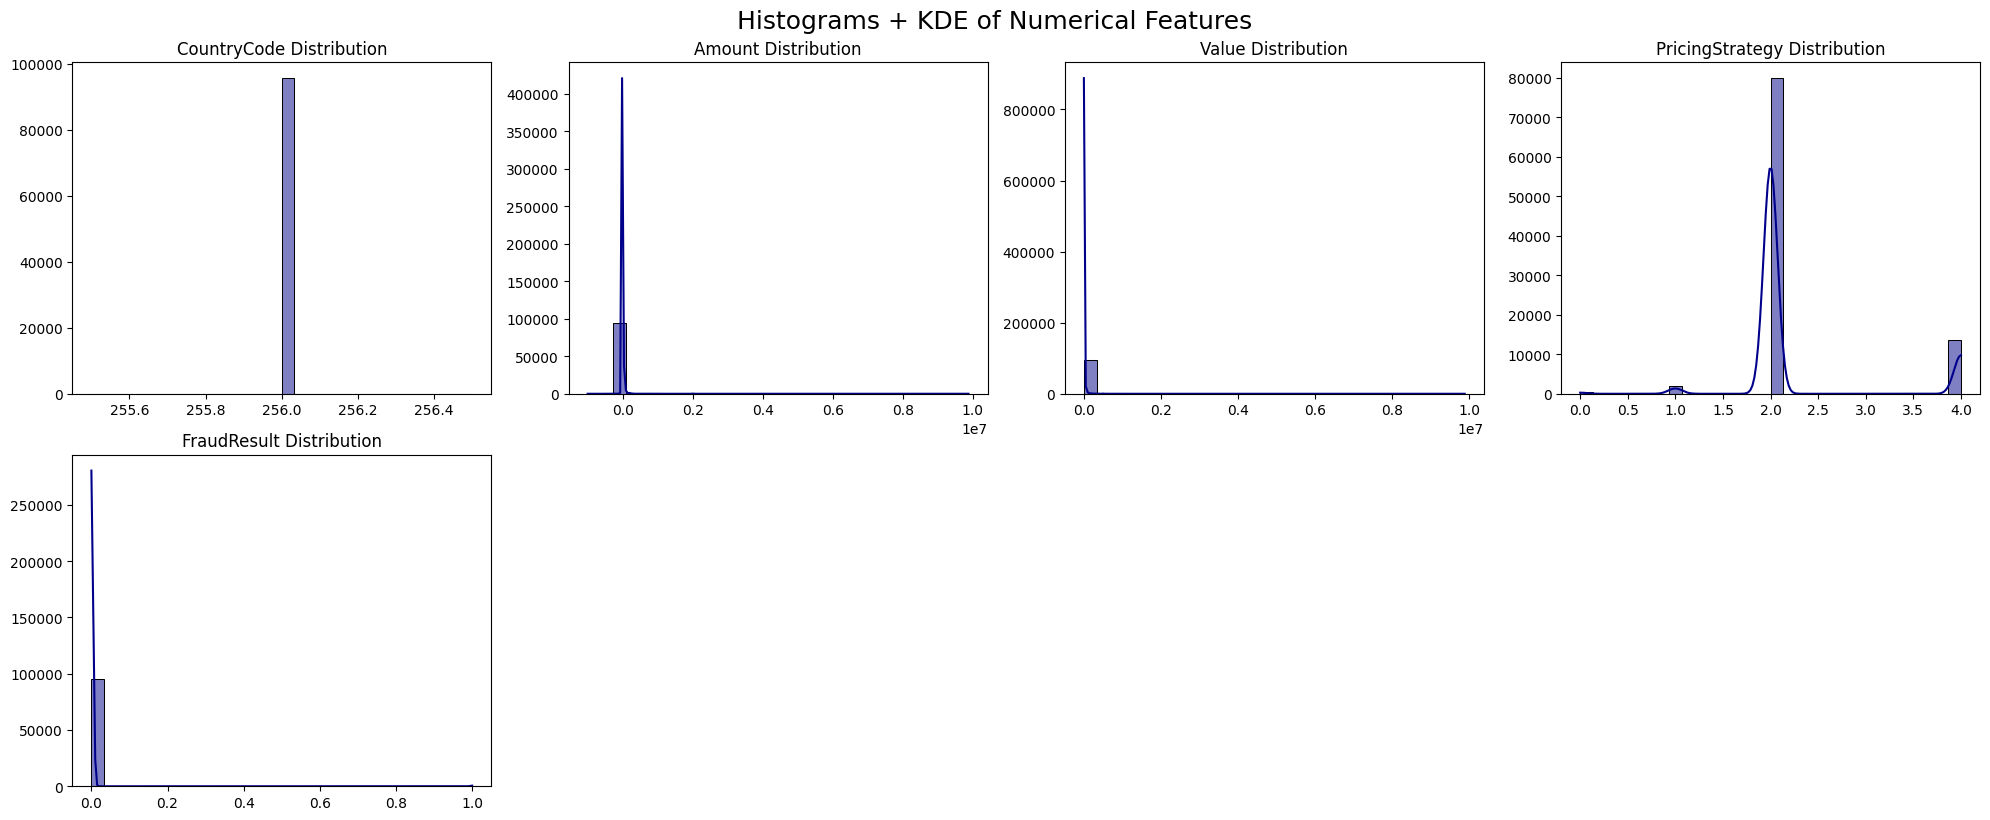

In [7]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

# 1. Summary Statistics & Written Insights
summary_stats = df[numerical_cols].agg(['count','mean','median','std','min','max','skew','kurt',lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75)]).round(2)
display(summary_stats)

# Written interpretation for each column
for col in numerical_cols:
    print(f"\nColumn: {col}")
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    skewness = df[col].skew()
    print(f" - Mean: {mean:.2f}, Median: {median:.2f}, Std: {std:.2f}, Skewness: {skewness:.2f}")
    if skewness > 1:
        print("   * Highly positively skewed → consider log transformation")
    elif skewness < -1:
        print("   * Highly negatively skewed → may need transformation")
    else:
        print("   * Approximately symmetric distribution")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f" - Outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# 2. Histograms for all numerical features
num_cols = len(numerical_cols)
cols = 4
rows = num_cols // cols + (num_cols % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='darkblue')
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histograms + KDE of Numerical Features", fontsize=18, y=1.02)
plt.show()


Distribution of Categorical Features
Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
#summary Table od categorical Fuatures
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("Unique Categories|variability:", df[col].nunique())
    print("Top Category:Dominance|", df[col].mode()[0])
    print("Frequency of Top Category|Distribution of top:\n", df[col].value_counts().head())



Column: TransactionId
Unique Categories|variability: 95662
Top Category:Dominance| TransactionId_1
Frequency of Top Category|Distribution of top:
 TransactionId
TransactionId_35670    1
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
Name: count, dtype: int64

Column: BatchId
Unique Categories|variability: 94809
Top Category:Dominance| BatchId_67019
Frequency of Top Category|Distribution of top:
 BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64

Column: AccountId
Unique Categories|variability: 3633
Top Category:Dominance| AccountId_4841
Frequency of Top Category|Distribution of top:
 AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
Name: count, dtype: int64

Column: SubscriptionId
Unique Categories|variability: 3627
Top Category:Dominance| SubscriptionId_3829
Freque


Column: TransactionId
Number of Unique Categories: 95662
Most Frequent Category: TransactionId_1
Top 5 Category Distribution:
TransactionId
TransactionId_35670    1
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
Name: count, dtype: int64


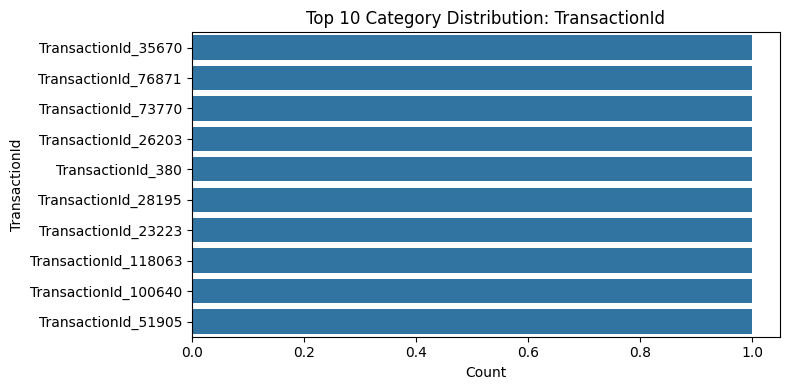


Column: BatchId
Number of Unique Categories: 94809
Most Frequent Category: BatchId_67019
Top 5 Category Distribution:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64


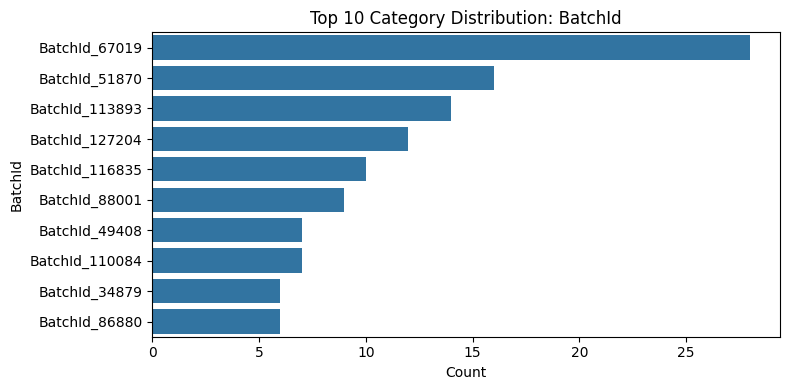


Column: AccountId
Number of Unique Categories: 3633
Most Frequent Category: AccountId_4841
Top 5 Category Distribution:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
Name: count, dtype: int64


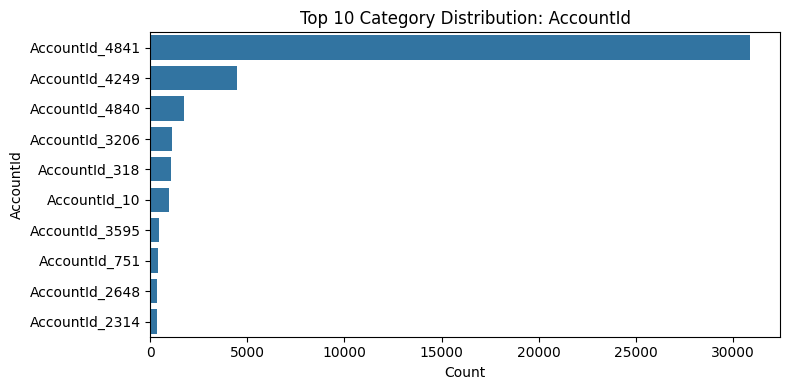


Column: SubscriptionId
Number of Unique Categories: 3627
Most Frequent Category: SubscriptionId_3829
Top 5 Category Distribution:
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
Name: count, dtype: int64


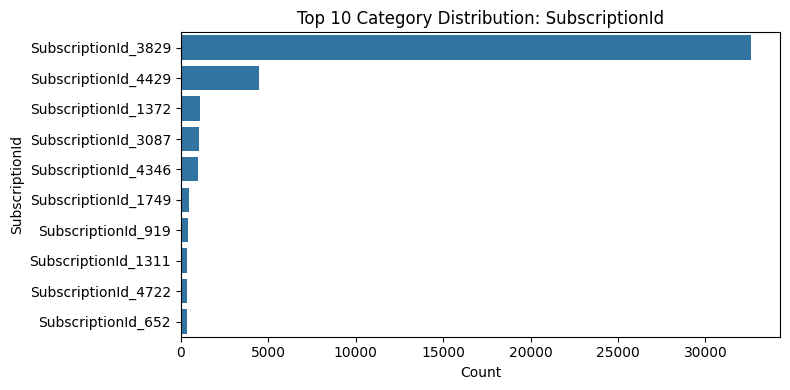


Column: CustomerId
Number of Unique Categories: 3742
Most Frequent Category: CustomerId_7343
Top 5 Category Distribution:
CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
Name: count, dtype: int64


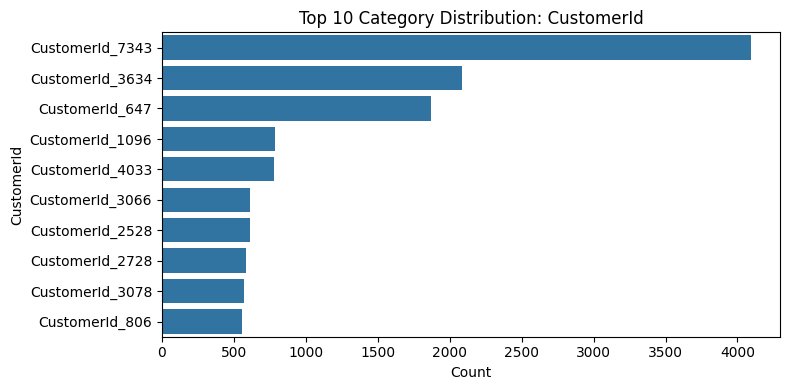


Column: CurrencyCode
Number of Unique Categories: 1
Most Frequent Category: UGX
Top 5 Category Distribution:
CurrencyCode
UGX    95662
Name: count, dtype: int64


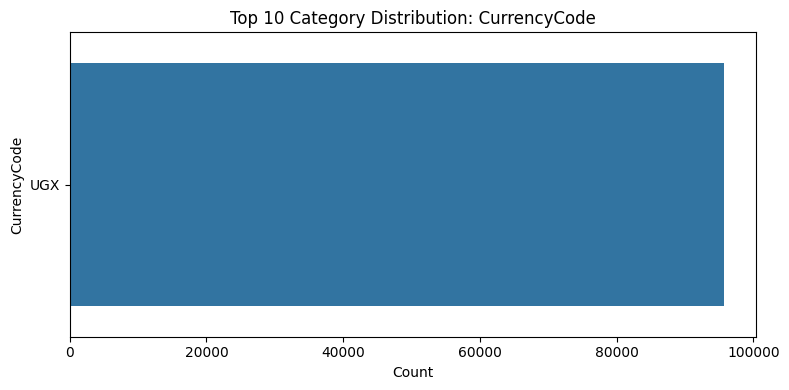


Column: ProviderId
Number of Unique Categories: 6
Most Frequent Category: ProviderId_4
Top 5 Category Distribution:
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
Name: count, dtype: int64


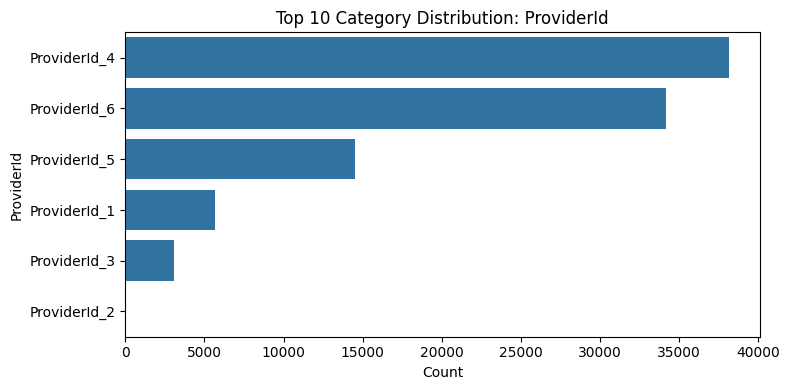


Column: ProductId
Number of Unique Categories: 23
Most Frequent Category: ProductId_6
Top 5 Category Distribution:
ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
Name: count, dtype: int64


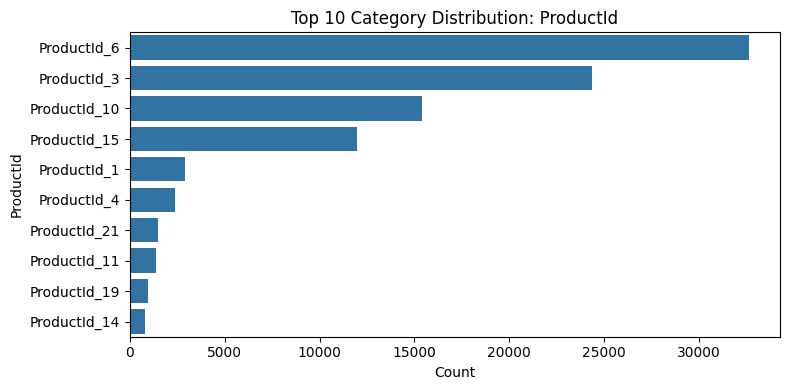


Column: ProductCategory
Number of Unique Categories: 9
Most Frequent Category: financial_services
Top 5 Category Distribution:
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
Name: count, dtype: int64


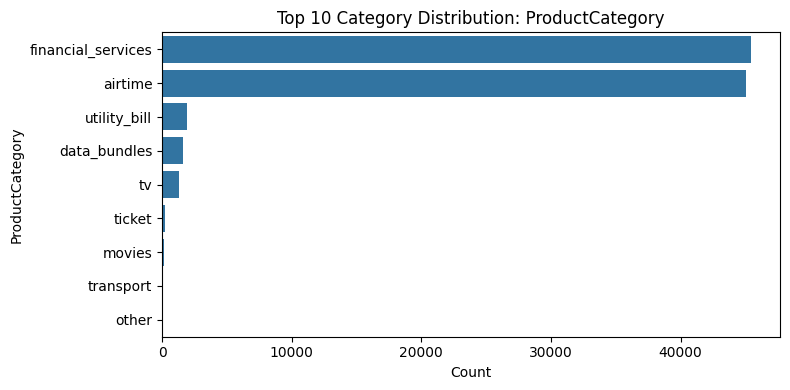


Column: ChannelId
Number of Unique Categories: 4
Most Frequent Category: ChannelId_3
Top 5 Category Distribution:
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


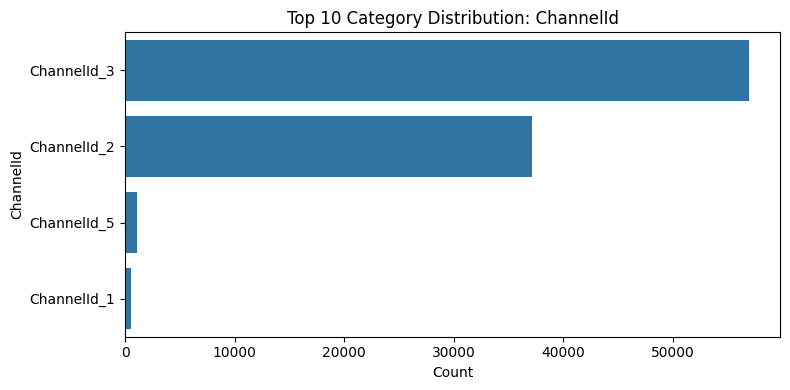


Column: TransactionStartTime
Number of Unique Categories: 94556
Most Frequent Category: 2018-12-24T16:30:13Z
Top 5 Category Distribution:
TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
Name: count, dtype: int64


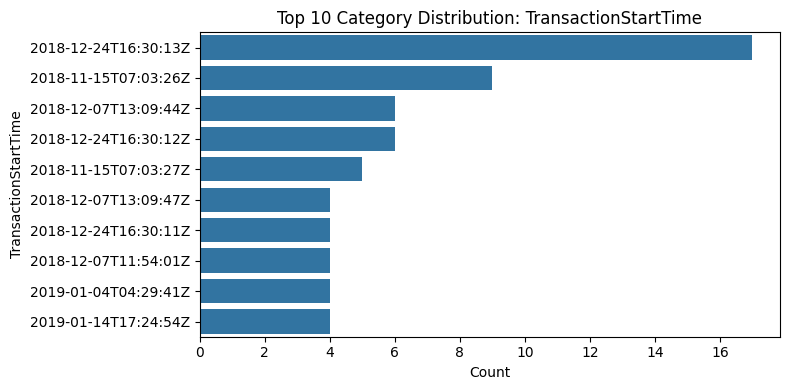

In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("Number of Unique Categories:", df[col].nunique(dropna=True))

    if df[col].dropna().empty:
        print("No valid categories found.")
        continue

    top_category = df[col].mode(dropna=True)[0]
    print("Most Frequent Category:", top_category)
    print("Top 5 Category Distribution:")
    print(df[col].value_counts().head())

    # Limit visualization to top 10 categories
    top_categories = df[col].value_counts().head(10)

    plt.figure(figsize=(8, 4))
    sns.countplot(
        y=col,
        data=df,
        order=top_categories.index
    )
    plt.title(f"Top 10 Category Distribution: {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


Correlation Analysis
Understanding the relationship between numerical features.

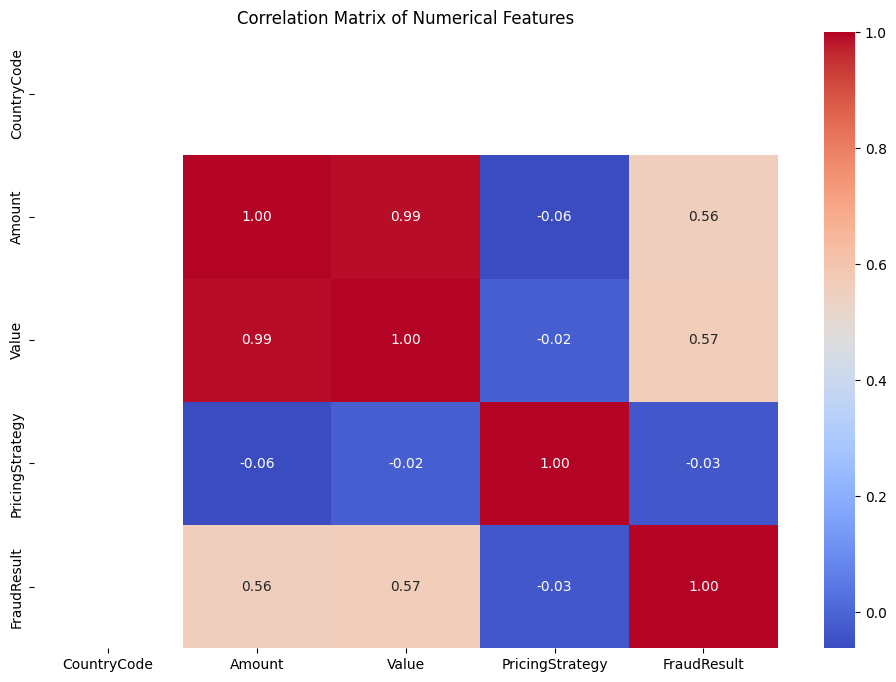

Highly correlated pairs (>|0.8|): [('Amount', 'Value', np.float64(0.99))]


In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Optional: print highly correlated pairs (>0.8 or <-0.8)
threshold = 0.8
high_corr = [(i, j, corr_matrix.loc[i,j]) 
             for i in numerical_cols for j in numerical_cols 
             if i != j and abs(corr_matrix.loc[i,j]) > threshold]
high_corr = list(set([tuple(sorted([i,j])+[round(val,2)]) for i,j,val in high_corr]))
print("Highly correlated pairs (>|0.8|):", high_corr)

Identifying Missing Values
Identify missing values to determine missing data and decide on appropriate imputation strategies.

,Missing Values,Percentage


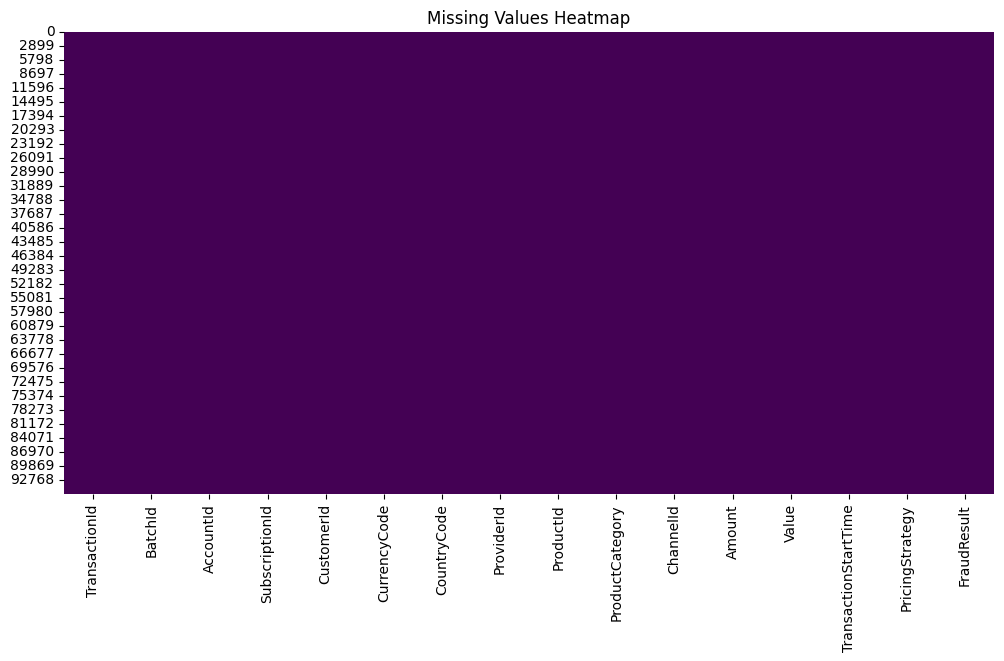

In [10]:
# Missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.concat([missing, missing_percent], axis=1)
missing_df.columns = ['Missing Values', 'Percentage']
missing_df = missing_df[missing_df['Missing Values'] > 0]  # only show columns with missing
display(missing_df)

# Optional: heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


Outlier Detection
Use box plots to identify outliers.

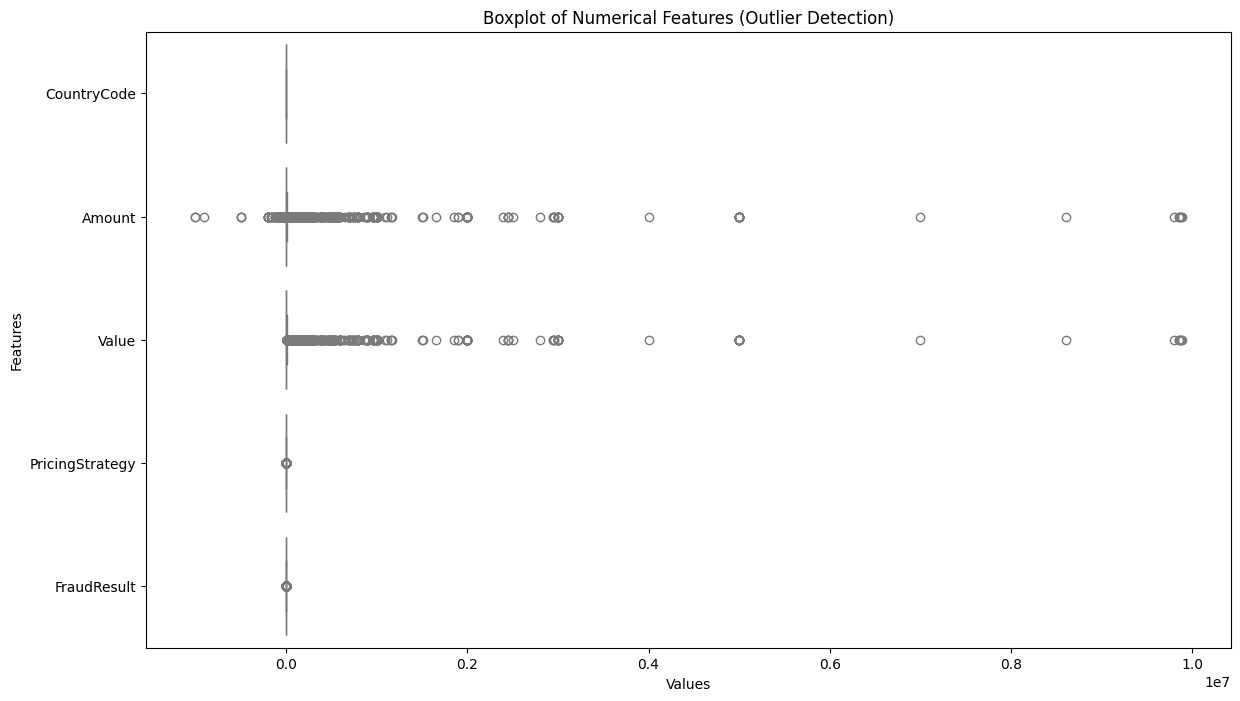

CountryCode: 0 outliers (0.00%)
Amount: 24441 outliers (25.55%)
Value: 9021 outliers (9.43%)
PricingStrategy: 15814 outliers (16.53%)
FraudResult: 193 outliers (0.20%)


In [11]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df[numerical_cols], orient='h', palette="Pastel2")
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

# Optional: print number of outliers per column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")
